In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -------------------------
# 2. Load Dataset
# -------------------------
df = pd.read_csv(r"C:\Users\vshpr\Downloads\readmission_data\diabetic_data.csv")  # Make sure the file is in your working directory
print("Shape:", df.shape)
df.head()

Shape: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
# 3. Data Cleaning
# -------------------------
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop ID columns
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

# Drop columns with high null values
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)


In [4]:
# 4. Target Variable
# -------------------------
# Create binary target: 1 = readmitted in <30 days, 0 = otherwise
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64


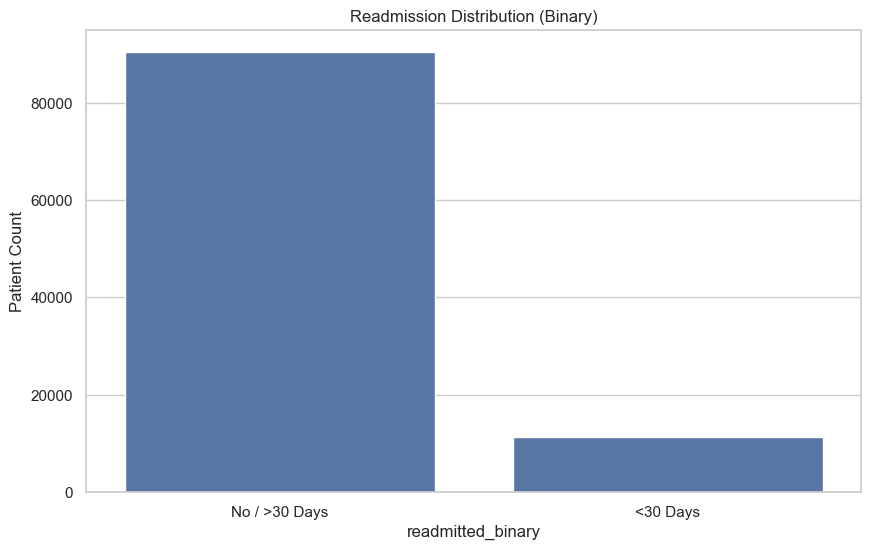

In [5]:
# 5. Explore Readmission Distribution
# -------------------------
print(df['readmitted_binary'].value_counts(normalize=True))

sns.countplot(x='readmitted_binary', data=df)
plt.title("Readmission Distribution (Binary)")
plt.xticks([0, 1], ['No / >30 Days', '<30 Days'])
plt.ylabel("Patient Count")
plt.show()

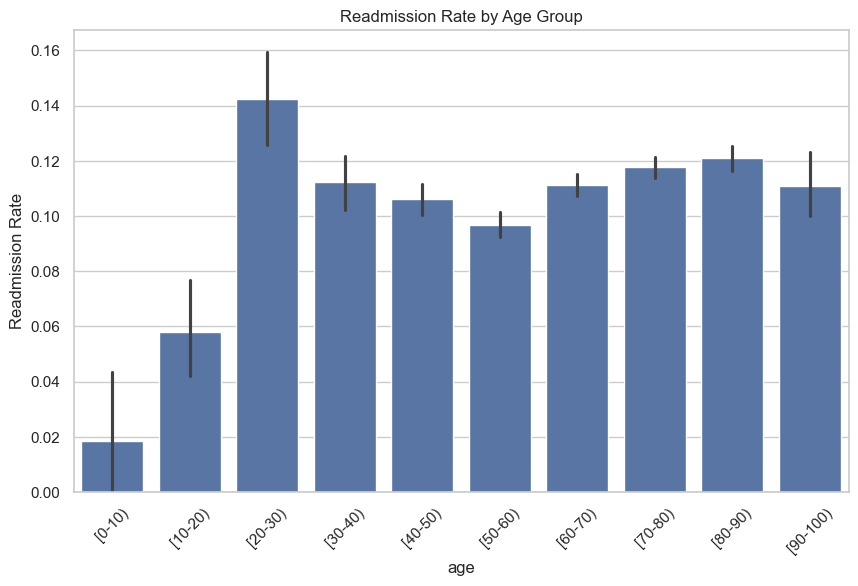

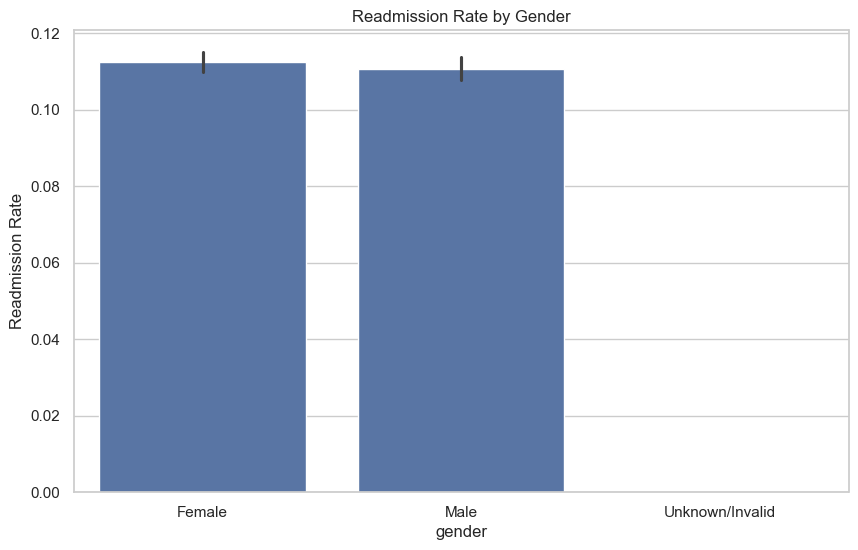

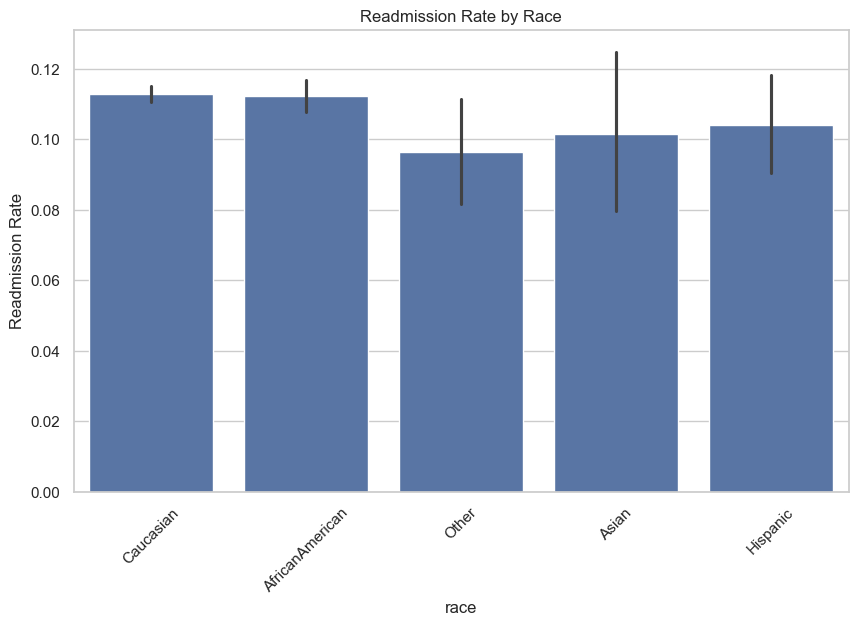

In [7]:
# 6. EDA – Demographics
# -------------------------

# Age Group vs Readmission Rate
sns.barplot(x='age', y='readmitted_binary', data=df, estimator=np.mean)
plt.title("Readmission Rate by Age Group")
plt.ylabel("Readmission Rate")
plt.xticks(rotation=45)
plt.show()

# Gender vs Readmission
sns.barplot(x='gender', y='readmitted_binary', data=df)
plt.title("Readmission Rate by Gender")
plt.ylabel("Readmission Rate")
plt.show()

# Race vs Readmission
sns.barplot(x='race', y='readmitted_binary', data=df)
plt.title("Readmission Rate by Race")
plt.ylabel("Readmission Rate")
plt.xticks(rotation=45)
plt.show()


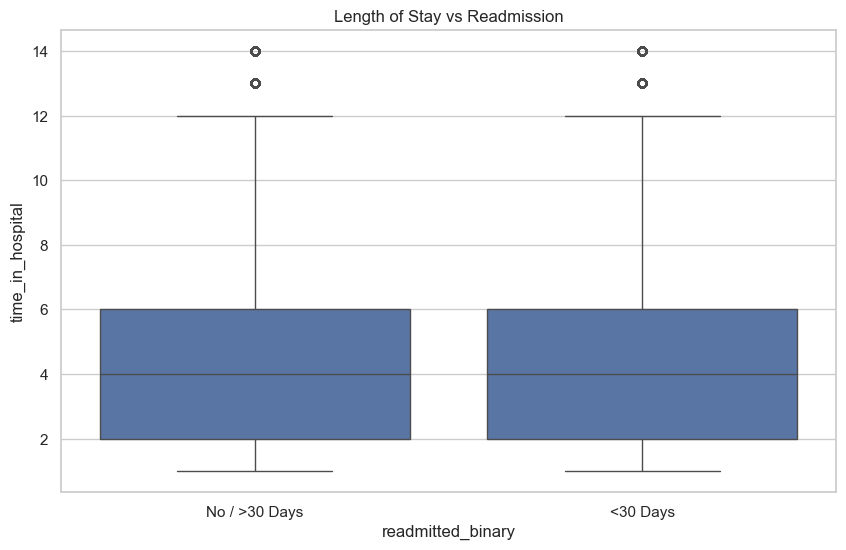

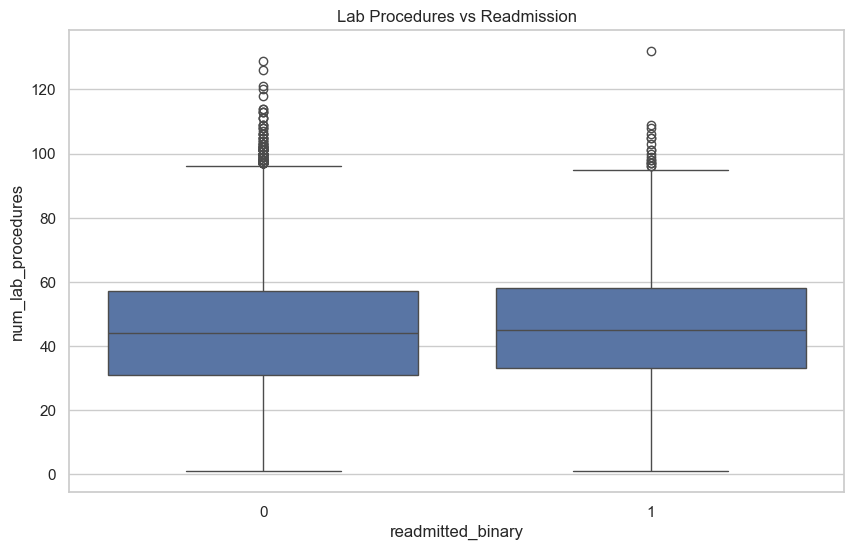

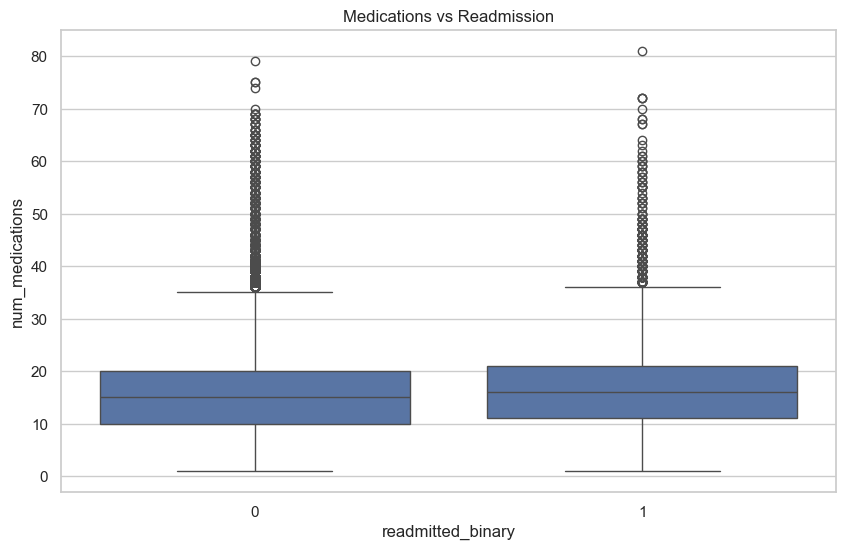

In [8]:
# 7. EDA – Clinical Factors
# -------------------------

# Time in hospital vs Readmission
sns.boxplot(x='readmitted_binary', y='time_in_hospital', data=df)
plt.title("Length of Stay vs Readmission")
plt.xticks([0, 1], ['No / >30 Days', '<30 Days'])
plt.show()

# Number of lab procedures vs Readmission
sns.boxplot(x='readmitted_binary', y='num_lab_procedures', data=df)
plt.title("Lab Procedures vs Readmission")
plt.show()

# Number of medications vs Readmission
sns.boxplot(x='readmitted_binary', y='num_medications', data=df)
plt.title("Medications vs Readmission")
plt.show()

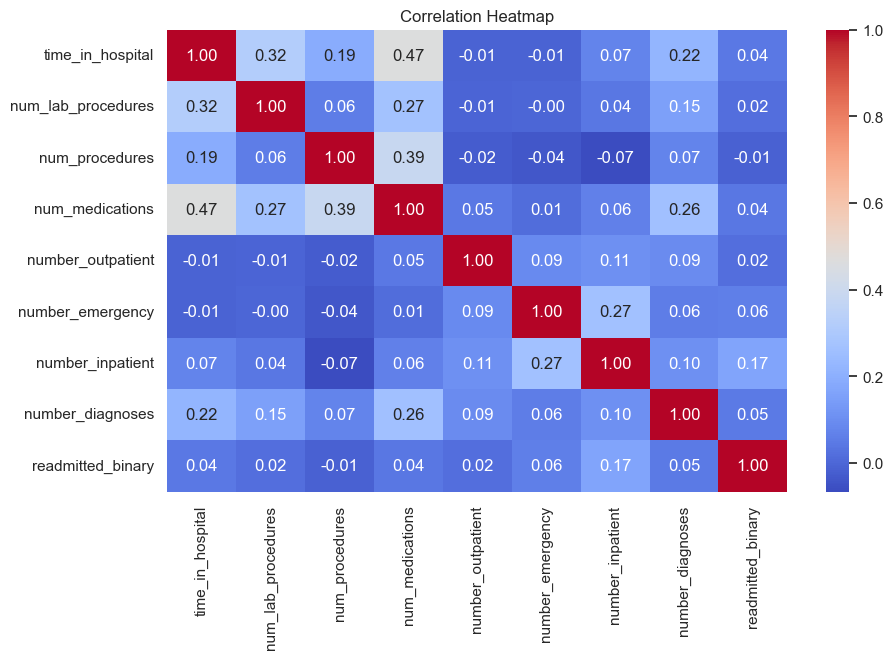

In [9]:
# 8. Correlation Heatmap (Numerical)
# -------------------------
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                      'num_medications', 'number_outpatient', 'number_emergency',
                      'number_inpatient', 'number_diagnoses', 'readmitted_binary']

corr = df[numerical_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 9. Key Insight Sample (Print Summary)

high_risk_age_group = df.groupby('age')['readmitted_binary'].mean().sort_values(ascending=False).head(3)
print("\n🔍 Age groups with highest readmission rate:")
print(high_risk_age_group)

high_med_count = df[df['readmitted_binary'] == 1]['num_medications'].mean()
low_med_count = df[df['readmitted_binary'] == 0]['num_medications'].mean()
print(f"\n💊 Avg. medications for readmitted: {high_med_count:.2f} vs not readmitted: {low_med_count:.2f}")


🔍 Age groups with highest readmission rate:
age
[20-30)    0.142426
[80-90)    0.120835
[70-80)    0.117731
Name: readmitted_binary, dtype: float64

💊 Avg. medications for readmitted: 16.90 vs not readmitted: 15.91


In [11]:
df.to_csv("cleaned_diabetic_data.csv", index=False)
